In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [71]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [72]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [73]:
mel_df = df[df['Class']==4]
beng_df = df[df['Class']==2]

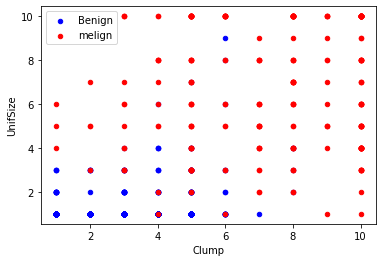

In [74]:
axes=beng_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
mel_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='melign', ax=axes)


In [89]:

df['BareNuc'] = df['BareNuc'].notnull().astype('int64')
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           699 non-null    int64
 1   Clump        699 non-null    int64
 2   UnifSize     699 non-null    int64
 3   UnifShape    699 non-null    int64
 4   MargAdh      699 non-null    int64
 5   SingEpiSize  699 non-null    int64
 6   BareNuc      699 non-null    int64
 7   BlandChrom   699 non-null    int64
 8   NormNucl     699 non-null    int64
 9   Mit          699 non-null    int64
 10  Class        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [93]:
features= ['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']
#x=np.asarray(features)
x=df[features]
y=df['Class']


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [96]:
from sklearn import svm

In [105]:
model = svm.SVC(kernel='linear', gamma='auto', C=2)
#c is used for penalty for each wrond side data points 
#kernal is for different dimentionalty
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [108]:
from sklearn.metrics import classification_report
result = classification_report(y_test,pred)
print(result)

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        88
           4       0.98      0.90      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

